<center>
    <h1>Qubot: A Bot That Can Finally Replace QA Testers?</h1>
    <br>
    Anthony  Krivonos (ak4483@columbia.edu) and Kenneth Chuen (kc3334@columbia.edu)<br>
    COMS  E6156  Topics  in  Software  Engineering
    <br><br>
    <h3>Field Test</h3>
</center>

> **Goal:** Perform 10 fully-automated exploratory tests on real-world websites. Assessment of results in the paper.

In [17]:
import numpy as np
!pip3 install qubot==0.0.12
from qubot import Qubot, QubotConfigTerminalInfo, QubotConfigModelParameters, QubotDriverParameters, QubotPresetRewardFunc
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
def plot_reward_history(qb):
    env = qb.get_env()

    plt.plot(range(len(env.get_training_rewards_history())), env.get_training_rewards_history())
    plt.xlabel('Episode #')
    plt.ylabel('Cumulative Training Reward')
    plt.title('Cumulative Q-Learning Training Reward') 
    plt.show()

    plt.plot(range(len(env.get_testing_rewards_history())), env.get_testing_rewards_history())
    plt.xlabel('Episode #')
    plt.ylabel('Cumulative Testing Reward')
    plt.title('Cumulative Q-Learning Testing Reward') 
    plt.show()

# Test 1
## Resume Website

URL: https://kennethchuen.com/

![test](./images/test_1.png)

In [3]:
# Initialize Qubot –– run this once
qb = Qubot(
    url_to_test="https://kennethchuen.com/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_classes=["navbar-brand"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_ids=["typography"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=10,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={}
)

In [12]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.8,
    gamma=0.8,
    epsilon=0.9,
    decay=0.0001,
    train_episodes=1000,
    test_episodes=100,
    step_limit=1000,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb.set_model_config(model_params, reward_func)
qb.train()

Training on 1000 episodes...
Training done.
Q-learning agent
Steps:                  16439
Alpha:                 0.8000
Gamma:                 0.8000
Original epsilon:      0.9000
Current epsilon:       0.0100
Decay:                 0.0100
Training rewards:       41393472
Training score:        41393.4720
Testing rewards:            0
Testing score:         0.0000
Testing penalties:          0
Testing penalty rate:  0.0000


In [14]:
qb.test()

Testing on 100 episodes...
Testing done.
Q-learning agent
Steps:                  114260
Alpha:                 0.8000
Gamma:                 0.8000
Original epsilon:      0.9000
Current epsilon:       0.0100
Decay:                 0.0100
Training rewards:       41393472
Training score:        41393.4720
Testing rewards:       -2430838
Testing score:        -24308.3800
Testing penalties:      2458738
Testing penalty rate:  24587.3800


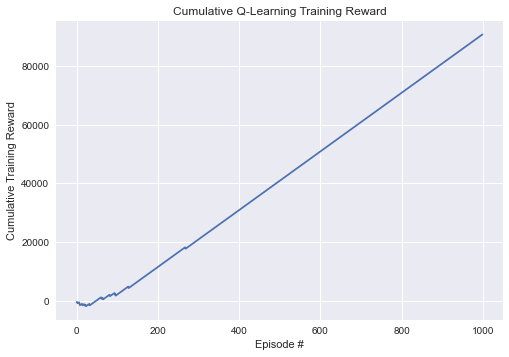

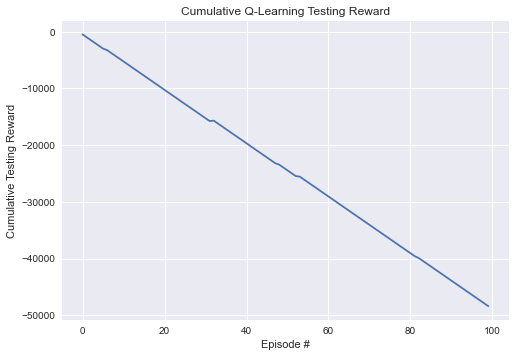

In [15]:
plot_reward_history(qb)